<a href="https://colab.research.google.com/github/wambak/OnlineXPMFitter/blob/main/fitcomparator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
# This will prompt for authorization.
drive.mount('/content/drive')
! git clone https://github.com/nEXOSkyline/XPMSimulator
! git clone https://github.com/nEXOSkyline/OnlineXPMFitter

Mounted at /content/drive
Cloning into 'XPMSimulator'...
remote: Enumerating objects: 294, done.
remote: Counting objects: 100% (87/87), done.
remote: Compressing objects: 100% (81/81), done.
remote: Total 294 (delta 35), reused 12 (delta 6), pack-reused 207
Receiving objects: 100% (294/294), 353.31 KiB | 16.06 MiB/s, done.
Resolving deltas: 100% (129/129), done.
Cloning into 'OnlineXPMFitter'...
remote: Enumerating objects: 199, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 199 (delta 5), reused 9 (delta 3), pack-reused 187
Receiving objects: 100% (199/199), 123.80 KiB | 17.69 MiB/s, done.
Resolving deltas: 100% (94/94), done.


In [2]:
! pip install numdifftools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 6.4 MB/s eta 0:00:00


In [3]:
! pip install lmfit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.1/101.1 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 kB 8.7 MB/s eta 0:00:00


0/content/OnlineXPMFitter/waveformCapture/captured/20230307test001
,1/content/OnlineXPMFitter/waveformCapture/captured/202303070410test000
,2/content/OnlineXPMFitter/waveformCapture/captured/20230307test002
,3/content/OnlineXPMFitter/waveformCapture/captured/20230305test001
,4/content/OnlineXPMFitter/waveformCapture/captured/202303072014test002
,5/content/OnlineXPMFitter/waveformCapture/captured/20230307test000
,6/content/OnlineXPMFitter/waveformCapture/captured/202303072014test003
,7/content/OnlineXPMFitter/waveformCapture/captured/20230307test004
,8/content/OnlineXPMFitter/waveformCapture/captured/202303072014test000
,9/content/OnlineXPMFitter/waveformCapture/captured/20230307test006
,10/content/OnlineXPMFitter/waveformCapture/captured/202303070410test001
,11/content/OnlineXPMFitter/waveformCapture/captured/20230307test005
,12/content/OnlineXPMFitter/waveformCapture/captured/202303072014test001
,13/content/OnlineXPMFitter/waveformCapture/captured/20230307test003



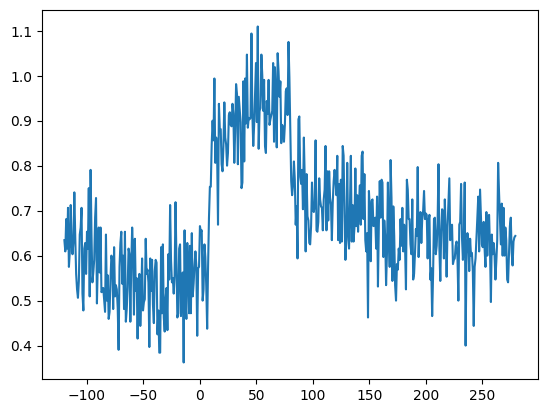

In [4]:
import glob
import sys
import numpy as np
import matplotlib.pyplot as plt
filelist = glob.glob('/content/OnlineXPMFitter/waveformCapture/captured/20*')
print((','.join([ str(num)+myfile+'\n' for num,myfile in zip( np.array(range(0,len(filelist)-1)),filelist ) ])) )
xy = np.loadtxt(filelist[13],delimiter=',')
xy2 = np.loadtxt(filelist[11],delimiter=',')
t = xy[:,0]
volt = xy[:,1]
voltbkg = xy2[:,1]
volt = volt - voltbkg
#volt = np.array([np.exp(t0/395.3)*v for t0,v in zip(t,volt)])
plt.plot(t,volt)

---Fermi Cathode FermiVoigt Anode---
[[Model]]
    Model(fermiC_skewVoigtA)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 73
    # data points      = 500
    # variables        = 8
    chi-square         = 49.6414536
    reduced chi-square = 0.10089726
    Akaike info crit   = -1138.89093
    Bayesian info crit = -1105.17406
    R-squared          = 0.99929173
##  Warning: uncertainties could not be estimated:
    gam_c:   at initial value
[[Variables]]
    qc:      32.7568142 (init = 30)
    sig_c:   1.49502459 (init = 2)
    gam_c:   0.50000000 (init = 0.5)
    qa:      30.2752801 (init = 30)
    sig_a:   0.61161530 (init = 2)
    gam_a:   0.77642708 (init = 0.5)
    skew_a:  2.42495592 (init = 1)
    offst:   0.53849898 (init = 0)
---OnlineXPMFitter---
[[Model]]
    Model(extra_smeared)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 9
    # data points      = 500
    # variables        = 3
    chi-square         = 106.1622

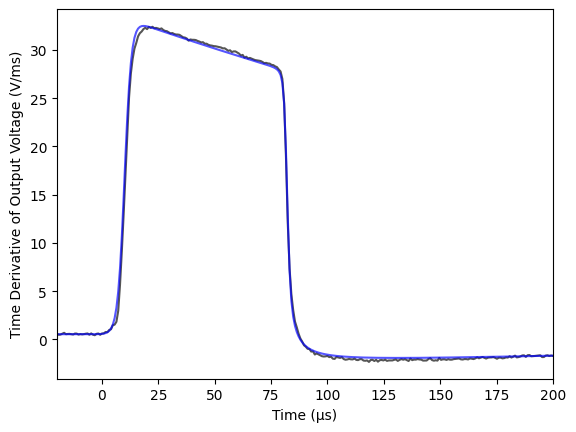

In [5]:
from uncertainties.core import wrap
import matplotlib as mpl
mpl.rc('figure',facecolor='white')
mpl.rc('lines', markersize = 1.6 )
mpl.rc('lines', markeredgewidth = 0.0 )
#mpl.rc('font', **{'family':'sans-serif','sans-serif':['Arial']})
import matplotlib.pyplot as plt
import time
import matplotlib.dates as dt
import numpy as np
import datetime
import random
import csv
#import ROOT
from scipy import integrate
from scipy import interpolate
from scipy.special import erfc
from scipy.optimize import curve_fit
from lmfit.models import SkewedVoigtModel
from lmfit.models import ExponentialGaussianModel
from lmfit.models import SkewedGaussianModel
from lmfit import Model
from lmfit import Parameters
import sys
sys.path.append('/content/OnlineXPMFitter/waveformCapture/captured')

pkmodel = SkewedVoigtModel()
catmodel = ExponentialGaussianModel()

catpars = catmodel.make_params()
err = 0.0
sqrt2 = np.sqrt(2.0)
sqrt2pi = np.sqrt(2.0*np.pi)
thold = 395.3
tc = 10.0
ta = 81.9



t = []
volt = []
wf = []
#with open('sig_plus_bkg1.dat') as ff:
with open('/content/OnlineXPMFitter/waveformCapture/captured/202303072014test003') as ff:
#with open('/content/OnlineXPMFitter/waveformCapture/captured/202303070410test000') as ff:
    for line in ff:
        try :
            t.append( float(line.split(',')[0]) )
            volt.append( float(line.split(',')[1]) )
        except ValueError:
            continue
tb = []
voltb = []
with open('/content/OnlineXPMFitter/waveformCapture/captured/202303072014test000') as ff:
    for line in ff:
        try :
            tb.append( float(line.split(',')[0]) )
            voltb.append( float(line.split(',')[1]) )
        except ValueError:
            continue

#wfmpre = '2;16;ASC;RP;MSB;500;"Ch1, AC coupling, 2.0E-2 V/div, 4.0E-5 s/div, 500 points, Average mode";Y;8.0E-7;0;-1.2E-4;"s";3.125E-6;0.0E0;-1.3824E4;"V"\n' #16 bit
#wfmpre = '1;8;ASC;RP;MSB;500;"Ch1, AC coupling, 2.0E-2 V/div, 4.0E-5 s/div, 500 points, Average mode";Y;8.0E-7;0;-1.2E-4;"s";8.0E-4;0.0E0;-5.4E1;"V"'
#t = [ 1.0e6*(float(wfmpre.split(';')[8])*float(i)+float(wfmpre.split(';')[10])) for i in range(0,500) ]
#volt = np.array([ 1.0e3*(( dl - float(wfmpre.split(';')[14]) )*float(wfmpre.split(';')[12]) - float(wfmpre.split(';')[13])) for dl in wfm ])
#volt = volt + 44.6*2
#bkg = [ 1.0e3*(( dl - float(wfmpre.split(';')[14]) )*float(wfmpre.split(';')[12]) - float(wfmpre.split(';')[13])) for dl in raw_bkg ]
volt = np.array([ -v[1] + v[0] for v in zip( volt , voltb ) ])
t = np.array(t)

#volt = np.array([np.exp(t0/395.3)*v for t0,v in zip(t,volt)])
vprime = np.gradient(volt)/np.gradient(t)
#baseline = np.concatenate((volt[0:150],volt[0:150],volt[0:150],volt[0:50]),axis=None)
#baseline = baseline - np.mean(baseline)

#p_i = [66.22,65.4702,41.5944,395.3,3.598,1.10272,80.4117,-390916.0,81.9]
#p_i = [65.669502,66.09416,41.967726,395.3,3.598,1.0884104,81.320328,1.80825,0.38634939]
p_i = [41.814864440434924, 41.513609990211904, 10.454241824848786, 2.500096809560329, 0.7947469675251235, 82.0070376906552, 2.7723460671136397, 0.3434182060200226, 1.3112624408030746, 0.48889382168534057]
#p_i = [41.82455053072373, 41.518519441501844, 10.45413165289595, 2.553132362269809, 0.795176337700352, 81.98058071984204, 2.733861086074098, 0.36151105277231244, 1.307247568879716, 0.48234273366695435]
#p_i = [41.9369652,42.0483193,10.0,3.598,0.980325759727434,81.9,1.80825,0.8,0.9,0.2]
#p_i = [41.9369652,42.0483193,10.0,1.0,0.980325759727434,81.9,2.9,0.8,0.9,0.2]
#p_i = [66.22,65.4702,41.5944,395.3,1.0,2.9,80.4117,-390916.0,81.9]
#p_i = [41.22,41.4702,0.5944,395.3,3.598,1.0884104,81.320328,1.80825,0.38634939]
#svi_norm = svi(t,p_i[5],p_i[6],p_i[7],p_i[8])
#svi_norm = interpolate.interp1d( t, svi_norm )

pars = pkmodel.make_params()

def extra_smeared(x, cat, an, tcrise, cent_c, gam_c, tarise, cent_a, gam_a, skew_a, offst):
    catpars['amplitude'].value = cat
    catpars['sigma'].value = tcrise
    catpars['center'].value = cent_c
    catpars['gamma'].value = gam_c
        # tfine = np.arange(x[-1]-1000.0,x[-1],0.08)
    integrand_c = catmodel.eval(catpars, x=x)
    integral_c = integrate.cumulative_trapezoid(integrand_c, x)
    integral_c = np.append(integral_c, integral_c[-1])
    y = integral_c * np.exp(-(x - 10.0) / 395.3)
    pars['amplitude'].value = an
    pars['sigma'].value = tarise
    pars['center'].value = cent_a
    pars['gamma'].value = gam_a
    pars['skew'].value = skew_a
    integrand_a = pkmodel.eval(pars, x=x)
    integral_a = integrate.cumulative_trapezoid(integrand_a, x)
    integral_a = np.append(integral_a, integral_a[-1])
    y = y - integral_a * np.exp(-(x - 81.9) / 395.3)
    y = y + offst
    return y

def gaussC_expogausA(t,vc,sig_c,va,sig_a,gam_a, integralC) :
    frac1 = (sig_c**2)/(2*(thold**2))
    frac2 = tc / thold
    exp1 = np.exp(frac1 + frac2)
    frac12 = vc * exp1 / ( sqrt2pi * sig_c )
    frac3 = -1 / (2*(sig_c**2))
    sq1 = (t - tc - (sig_c**2)/thold )**2
    exp2 = np.exp(frac3*sq1)
    #
    gausC = frac12*exp2
    #
    mult1 = va*gam_a/2
    frac4 = gam_a*(sig_a**2)/2
    mult2 = np.exp(gam_a*(ta + frac4) + t*(1/thold - gam_a))
    numerator1 = ta + gam_a*(sig_a**2) - t
    mult3 = erfc(numerator1/(sqrt2*sig_a))
    #
    expogausA = mult1 * mult2 * mult3
    #
    integrand = np.exp(t/thold)*(gausC - expogausA)
    #
    # there is one more parameter added when you integrate - the Constant of Integration.
    # The constant of integration actually gets multiplied by 1/(integratingFactor)
    # because the entire integral got multiplied by it
    #
    integral_model = np.exp(-t/thold)*(  integrate.cumulative_trapezoid(integrand, t, initial=0.0)  + integralC)
    #integal_model = np.append(integral_model,0.0)
    #
    return integral_model
    #
#

from scipy.special import wofz
CF = 1.0
# def fermiC_skewVoigtA (t,qc,sig_c,gam_c,qa,sig_a,gam_a,skew_a,offst):
#     z = (t - ta + gam_a*1j)/(sig_a*sqrt2)
#     realw = np.real(wofz(z))
#     i_a = (realw)*(qa*(1.0/skew_a)/(1.0+np.exp((ta-t)/skew_a)))
#     anode = -(1.0/CF)*np.exp(-(t-ta)/thold)*integrate.cumulative_trapezoid( np.exp((t-ta)/thold)*i_a, t, initial=0.0)
#     cathode = (qc)*np.exp((tc-t)/thold)*( 1.0/(1+np.exp(tc/sig_c-t/sig_c)) )
#     return cathode + anode + offst

def fermiC_skewVoigtA (t,qc,sig_c,gam_c,qa,sig_a,gam_a,skew_a,offst):
    z = (t - ta + gam_a*1j)/(sig_a*sqrt2)
    realw = qa*np.real(wofz(z))/(sqrt2pi*sig_a)
    # skew voigt function multiplies by 1+erf() which
    # goes from 0 to 2
    # we were multiplying by a fermi function which goes
    # from 0 to 1, so we have to add an extra constant
    # multiple of 2.0 to get the fermi function
    # from 0 to 2
    i_a = (realw)*(2.0/(1.0+np.exp((ta-t)/skew_a)))
    anode = -(1.0/CF)*np.exp(-(t-ta)/thold)*integrate.cumulative_trapezoid( np.exp((t-ta)/thold)*i_a, t, initial=0.0)
    # we take the amplifier-circuit-integral of the fermi function derivative
    cathode = np.exp((tc-t)/thold) * integrate.cumulative_trapezoid(
        # np.exp((t-tc)/thold)*(qc)*( 1.0/(1+np.exp((tc-t)/sig_c)) )*np.exp(-(t-tc)/gam_c),
        np.exp((t-tc)/thold)*(qc)*(1/sig_c)*np.exp((t-tc)/sig_c)/((np.exp((t-tc)/sig_c)+1)**2),
        t, initial=0.0
    )
    return cathode + anode + offst

def fitter_func(t, qc, qa, sig_c, sig_a, offst): #in use at SLAC
    z = np.array(t)
    x_beg = z[z<10.0]
    x_mid = z[(z>=10.0)*(z<81.9)]
    x_end = z[z>=81.9]
    y_beg = 0.5*qc*erfc(-(x_beg-10.0)/sig_c) - 0.5*qa*erfc(-(x_beg-81.9)/sig_a)
    y_mid = 0.5*qc*erfc(-(x_mid-10.0)/sig_c)*np.exp(-(x_mid-10.0)/thold) - 0.5*qa*erfc(-(x_mid-81.9)/sig_a)
    y_end = 0.5*qc*erfc(-(x_end-10.0)/sig_c)*np.exp(-(x_end-10.0)/thold) - 0.5*qa*erfc(-(x_end-81.9)/sig_a)*np.exp(-(x_end-81.9)/thold)
    y = np.concatenate((y_beg,y_mid,y_end),axis=None)
    y = y + offst
    return y

p_i = [37.873185672822736, 40.81570955383812, 10.0, 3.598, 0.980325759727434, 81.9, 1.80825, 0.8, 0.9, 0.2]
wavmodel = Model(extra_smeared, nan_policy='raise')
wavparams = wavmodel.make_params()
wavparams['cat'].value = p_i[0]
wavparams['cat'].vary = True
wavparams['an'].value = p_i[1]
wavparams['an'].vary = True
wavparams['cent_c'].value = p_i[2]
wavparams['cent_c'].vary = False
# self.wavparams['thold'].value = self.p_i[3]
# self.wavparams['thold'].vary = False
wavparams['tcrise'].value = p_i[3]
wavparams['tcrise'].vary = False
wavparams['tarise'].value = p_i[4]
wavparams['tarise'].vary = False
wavparams['cent_a'].value = p_i[5]
wavparams['cent_a'].vary = False
wavparams['gam_a'].value = p_i[6]
wavparams['gam_a'].vary = False
wavparams['skew_a'].value = p_i[7]
wavparams['skew_a'].vary = False
wavparams['gam_c'].value = p_i[8]
wavparams['gam_c'].vary = False
wavparams['offst'].value = p_i[9]
wavparams['offst'].vary = True







wavefunc = Model(gaussC_expogausA,nan_policy='raise')
wavepars = wavefunc.make_params()
wavepars['vc'].value = 30.950772666960468 - 20.0
wavepars['vc'].vary = True
wavepars['va'].value = 26.42380771160777
wavepars['va'].vary = True
# 1 microsecond
wavepars['sig_c'].value = 2.302430151048245
wavepars['sig_c'].vary = True
wavepars['sig_a'].value = 1.3912360457739192
wavepars['sig_a'].vary = True
# 1 per second - or something
wavepars['gam_a'].value = 1.8
wavepars['gam_a'].vary = True
wavepars['gam_a'].min = 0.01 + 1.0/thold
wavepars['gam_a'].max = 3.441
# Constant of Integration +C gets multiplied by the integrating factor
wavepars['integralC'].value = 0
wavepars['integralC'].vary = True


slacfunc = Model(fitter_func,nan_policy='raise')
slacpars = slacfunc.make_params()
slacpars['qc'].value = 1.0
slacpars['qc'].vary = True
slacpars['qa'].value = 1.0
slacpars['qa'].vary = True
slacpars['sig_c'].value = 1.0
slacpars['sig_c'].vary = True
slacpars['sig_a'].value = 1.0
slacpars['sig_a'].vary = True
slacpars['offst'].value = 1.0
slacpars['offst'].vary = True


fermifunc = Model(fermiC_skewVoigtA,nan_policy='raise')
fermipars = fermifunc.make_params()
fermipars['qc'].value = 30.0
fermipars['qc'].vary = True
fermipars['sig_c'].value = 2.0
fermipars['sig_c'].vary = True
fermipars['gam_c'].value = 0.5
fermipars['gam_c'].vary = True
fermipars['qa'].value = 30.0
fermipars['qa'].vary = True
fermipars['sig_a'].value = 2.0
fermipars['sig_a'].vary = True
fermipars['gam_a'].value = 0.5
fermipars['gam_a'].vary = True
fermipars['skew_a'].value = 1.0
fermipars['skew_a'].vary = True
fermipars['offst'].value = 0.0
fermipars['offst'].vary = True
### sig_c should never be zero to avoid division by zero
fermipars['sig_a'].min = 0.1
fermipars['skew_a'].min = 0.1
fermipars['sig_c'].min = 0.1
###

oxpmf = wavmodel.fit(volt, wavparams, x=t)
wavparams['cat'].value = oxpmf.best_values['cat']
wavparams['an'].value = oxpmf.best_values['an']
wavparams['offst'].value = oxpmf.best_values['offst']


f_y = wavefunc.eval(t=t,params=wavepars)
fit_f_y = wavefunc.fit(volt, wavepars, t=t)

slac_y = slacfunc.eval(t=t,params=slacpars)
fit_slac_y = slacfunc.fit(volt, slacpars, t=t)

fermi_y = fermifunc.eval(t=t,params=fermipars)
fit_fermi_y = fermifunc.fit(volt, fermipars, t=t)

bestfit = fit_f_y.best_values
wavepars['vc'].value = bestfit['vc']
wavepars['va'].value = bestfit['va']
#wavepars['sig_c'].value = bestfit['sig_c']
#wavepars['sig_a'].value = bestfit['sig_a']
#print(bestfit)

bestfitSlac = fit_slac_y.best_values
slacpars['qc'].value = bestfitSlac['qc']
slacpars['qa'].value = bestfitSlac['qa']
slacpars['sig_c'].value = bestfitSlac['sig_c']
slacpars['sig_a'].value = bestfitSlac['sig_a']
slacpars['offst'].value = bestfitSlac['offst']

bestfitFermi = fit_fermi_y.best_values
fermipars['qc'].value = bestfitFermi['qc']
fermipars['sig_c'].value = bestfitFermi['sig_c']
fermipars['gam_c'].value = bestfitFermi['gam_c']
fermipars['qa'].value = bestfitFermi['qa']
fermipars['sig_a'].value = bestfitFermi['sig_a']
fermipars['gam_a'].value = bestfitFermi['gam_a']
fermipars['skew_a'].value = bestfitFermi['skew_a']
fermipars['offst'].value = bestfitFermi['offst']




bestfit_f_y = wavefunc.eval(t=t,params=wavepars)
bestfit_slac_y = slacfunc.eval(t=t,params=slacpars)
bestfit_fermi_y = fermifunc.eval(t=t,params=fermipars)

#integral_data = integrate.cumulative_trapezoid(vprime, t)
#integral_model = integrate.cumulative_trapezoid(bestfit_f_y, t)
#plt.plot(t,f_y)
plt.plot(t,volt, color="#000A") ##
# plt.plot(t,vprime, color="#000A") ##
# plt.plot(t,f_y)
# plt.plot(t,bestfit_f_y)
# plt.plot(t,slac_y)
#plt.plot(t,bestfit_slac_y, color="#F00F") ##
# plt.plot(t,fermi_y)
#plt.plot(t,wavmodel.eval(x=t,params=wavparams), color="#F00F")
plt.plot(t,bestfit_fermi_y, color="#00FA") ##
#plt.plot(t[0:-1],integral_model)
plt.xlim([-20,200])
# plt.show()
plt.xlabel("Time (\u00B5s)")
# plt.ylabel("Output Voltage (mV)") ##
plt.ylabel("Time Derivative of Output Voltage (V/ms)") # for vprime. Not sure if it's actually
# V/ms or some other unit, but the dimensions are definitely voltage (electric potential) per time.

print("---Fermi Cathode FermiVoigt Anode---\n" + fit_fermi_y.fit_report())
#print("---SLAC Function---\n" + fit_slac_y.fit_report())
print("---OnlineXPMFitter---\n" + oxpmf.fit_report())


